In [ ]:
import os
os.chdir("./study material/")
!pip install -r requirements.txt

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
stocks = pd.read_csv("./prices.csv")
stocks["date"] = pd.to_datetime(stocks["date"])
stocks.head(15)

In [ ]:
from collections import defaultdict
symbol_dict = defaultdict(int)
for sym in stocks["symbol"]:
    symbol_dict[sym] += 1
print(symbol_dict.keys())

In [ ]:
stocks[(stocks["symbol"]=="WLTW") & (stocks["date"] >= "2016-01-20") & (stocks["date"] <= "2016-01-30")]

In [ ]:
def plot_symbol_within_jan(sym, highlight):
    c = "blue" if highlight else "gray"
    datas = stocks[(stocks["symbol"]==sym)]
    plt.plot(datas["date"], datas["close"], label=sym, color=c)

In [ ]:
print(len(symbol_dict.keys()))
filter_ar = np.random.choice([False,True], size=len(symbol_dict.keys()), p=[0.99,0.01])
while filter_ar.sum() > 50:
    filter_ar = np.random.choice([False,True], size=len(symbol_dict.keys()), p=[0.99,0.01])

keys = np.array(list(symbol_dict.keys()))
filtered_keys = keys[filter_ar]
print(len(filtered_keys))

isHighLighted = False
for sym in filtered_keys:
    prob_hL = [False]
    if not isHighLighted:
        prob_hL = np.random.choice([False, True], 1, p=[0.60,0.40])
    # print(prob_hL[0])
    plot_symbol_within_jan(sym, prob_hL[0])
    if prob_hL[0]: 
        isHighLighted = prob_hL

if not isHighLighted:
    print("change color of last one blue")
    ax = plt.gca()
    lines = ax.get_lines()
    lines[-1].set_color("blue")

plt.legend()




In [ ]:
data = pd.read_csv('2019-05-31-data.csv')
data.head()

In [ ]:
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

In [ ]:
fig, ax = plt.subplots()

pc = ax.scatter(view_count, likes,
           edgecolors="black",
           c=ratio,
        #    cmap="summer",
           linewidths=1, alpha=0.8
           )

cbar = fig.colorbar(pc)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Trending YouTube Videos")
ax.set_ylabel("Total Likes")
ax.set_xlabel("View Count")

fig.tight_layout()

In [178]:
data = pd.read_csv("hans_rosling_v4.csv")
data.head()

,Country,Year,Life Expectancy,Children per Woman,Population,Continent,Income per Person,Child Mortality
0,Afghanistan,Y1962,33.01,7.67,9.3,Asia,1200,352.0
1,Afghanistan,Y1963,33.53,7.67,9.5,Asia,1190,346.0
2,Afghanistan,Y1964,34.07,7.67,9.7,Asia,1190,340.0
3,Afghanistan,Y1965,34.60,7.67,9.9,Asia,1190,334.0
4,Afghanistan,Y1966,35.13,7.67,10.1,Asia,1180,328.0


In [179]:
data = data[data["Year"] == "Y2015"]
data.head()

,Country,Year,Life Expectancy,Children per Woman,Population,Continent,Income per Person,Child Mortality
53,Afghanistan,Y2015,53.8,4.47,32.5,Asia,1750,73.2
107,Albania,Y2015,78.0,1.78,2.9,Europe,11000,14.0
161,Algeria,Y2015,76.4,2.71,39.7,Africa,13700,25.5
215,Angola,Y2015,59.6,5.65,25.0,Africa,6230,86.5
269,Argentina,Y2015,76.5,2.15,43.4,Americas,19100,11.6


In [ ]:
for country in data["Country"].unique():
    print(country)

In [181]:
life_expectancy = data["Life Expectancy"]
income_per_person = data["Income per Person"]

In [242]:
import matplotlib.colors as mcolor

def custom_color_to_colorbar(custom_color, axis):
    colors = [
        custom_color[-1],
        custom_color[len(custom_color)//2],
        custom_color[0]
    ]
    print(colors)
    cmap = mcolor.LinearSegmentedColormap.from_list('my_cmap', colors, gamma=2)
    norm = plt.Normalize(custom_color[:,axis].min(), custom_color[:,axis].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    return sm

[array([0. , 0.5, 1. ]), array([0.       , 0.2518797, 0.5037594]), array([0., 0., 0.])]


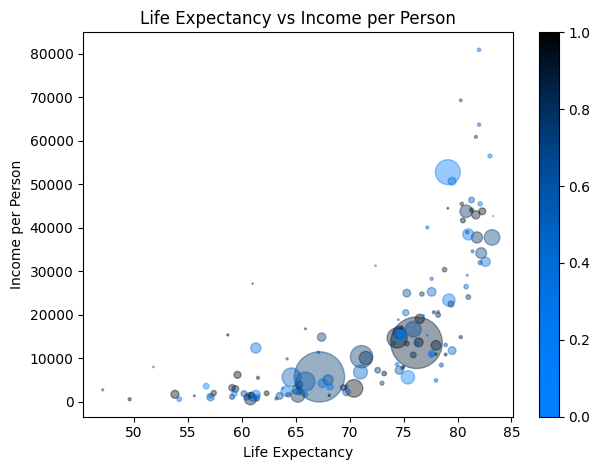

In [243]:
import matplotlib.colors as mcolor

fig, ax =plt.subplots()

# in this code, colormap doesn't convey any info.
# I just want to make color bar and colors

#H : 0~360, 
#S : 0~100,
#V : 0~100
# 216, 100, 100 ==> blue color #0066FF
c_colors = np.array([mcolor.hsv_to_rgb([210/360,100/100,x/100]) for x in list(np.linspace(0,100,134))])
# print(c_colors)
pc = ax.scatter(life_expectancy, income_per_person,
           s=data["Population"],
           c=c_colors,
           alpha=0.4
           )

fig.colorbar(custom_color_to_colorbar(c_colors,2),ax=ax)

ax.set_xlabel("Life Expectancy")
ax.set_ylabel("Income per Person")
ax.set_title("Life Expectancy vs Income per Person")

fig.tight_layout()

In [227]:
np_arr = np.array(c_colors)
np_arr[:,1]

array([0.        , 0.0037594 , 0.0075188 , 0.0112782 , 0.01503759,
       0.01879699, 0.02255639, 0.02631579, 0.03007519, 0.03383459,
       0.03759398, 0.04135338, 0.04511278, 0.04887218, 0.05263158,
       0.05639098, 0.06015038, 0.06390977, 0.06766917, 0.07142857,
       0.07518797, 0.07894737, 0.08270677, 0.08646617, 0.09022556,
       0.09398496, 0.09774436, 0.10150376, 0.10526316, 0.10902256,
       0.11278195, 0.11654135, 0.12030075, 0.12406015, 0.12781955,
       0.13157895, 0.13533835, 0.13909774, 0.14285714, 0.14661654,
       0.15037594, 0.15413534, 0.15789474, 0.16165414, 0.16541353,
       0.16917293, 0.17293233, 0.17669173, 0.18045113, 0.18421053,
       0.18796992, 0.19172932, 0.19548872, 0.19924812, 0.20300752,
       0.20676692, 0.21052632, 0.21428571, 0.21804511, 0.22180451,
       0.22556391, 0.22932331, 0.23308271, 0.23684211, 0.2406015 ,
       0.2443609 , 0.2481203 , 0.2518797 , 0.2556391 , 0.2593985 ,
       0.26315789, 0.26691729, 0.27067669, 0.27443609, 0.27819